# Кластеризация и тематическое моделирование

Мы хотим наблюдать некоторое сходство между группами объектов и включать их в соответствующие кластеры. Некоторые объекты могут сильно отличаться от всех кластеров, и таким образом мы предполагаем, что эти объекты являются аномалиями.

![alt](https://i.ibb.co/pbvs457/image-38.png)

## Посмотрим на примере датасета с Kaggle - [Wine Dataset.](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

#### В нем такие столбцы:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
*Proline

> Мы хотим каким-то образом их сгруппировать - выделить похожие вина рядом в один сегмент и непохожие в другой.

In [1]:
import pandas as pd

url = "https://drive.usercontent.google.com/u/0/uc?id=198zph4O7_HtqKW_zZ_VHJucNHRj0Hn1u&export=download"

df = pd.read_csv(url)

In [2]:
#Посмотрим на структуру датасета
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Посчитаем базовые описательные статистические меры
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Построим дендрограмму

In [4]:
%%capture
#Устанавливаем модуль, со всякими штуками, связанными с машинным обучением
!pip install scikit-learn
#Модуль со статистическими инструментами
!pip install scipy

#Импортируем функцию для кластеризации
from sklearn.cluster import AgglomerativeClustering

#Импортируем модуль, чтобы рисовать графики
import matplotlib.pyplot as plt

#Загружаем модель для кластеризации и говорим, что кластеров будет 6
model = AgglomerativeClustering(n_clusters=6)

In [5]:
#Обучаем модель. Она берёт всю таблицу и на основании всех числовых столбцов
#относит каждую строчку к одному из 6 кластеров
y_model = model.fit_predict(df)

In [6]:
#Как выглядит результат: перечисление кластеров для строк
y_model

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 5, 1, 1,
       3, 3, 5, 5, 3, 0, 5, 3, 0, 0, 3, 0, 3, 5, 5, 3, 3, 1, 1, 3, 3, 1,
       5, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 4, 4, 1,
       2, 2, 1, 1, 5, 4, 2, 3, 5, 4, 4, 2, 1, 2, 4, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 4, 4, 3, 1, 4, 1, 4, 1, 2, 4, 4, 1, 4, 2, 2, 4, 1,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 1, 2, 4, 4, 4, 4, 4, 2, 4, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 5, 5, 4, 1, 1, 2, 2, 2, 4, 1,
       1, 1, 2, 5, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5,
       5, 2])

In [7]:
#Добравляем кластеры в таблицу
df['Cluster'] = y_model

#И вот они в таблице — см. последний столбец
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Теперь визуализируем, что у нас получилось

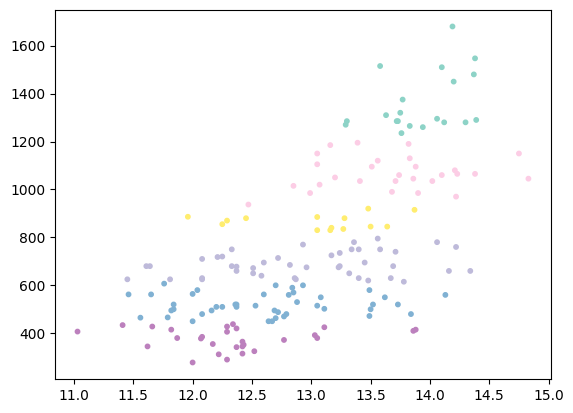

In [8]:
#Отображаем данные по точкам, за координаты берём градус алкоголя
#и количество пролина (можно было бы взять и что-то другое);
#раскрашиваем в соответствии с кластерами
plt.scatter(x = df['Alcohol'], y = df['Proline'], c=df['Cluster'], s=10, cmap = "Set3")

#### Количество кластеров

Мы вручную выбрали количество кластеров, на которое делим. Это количество может не соответствовать внутренней структуре данных: может оказаться, что кластеров на самом деле больше или меньше (ну или вовсе нет — но тогда вообще нет смысла использовать метод).

Попробуем разные другие количества.

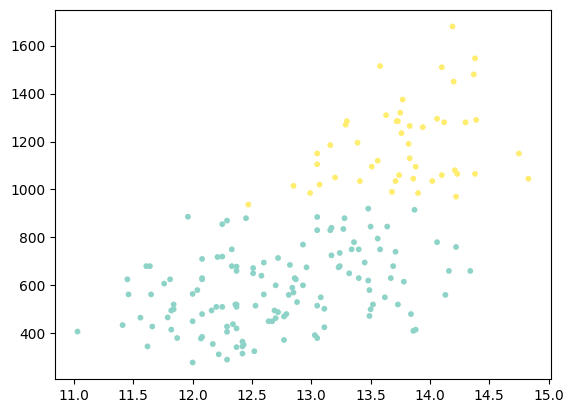

In [9]:
#Вот тут задаём количество кластеров: 2
model = AgglomerativeClustering(n_clusters=2)

#Остальное не меняется
y_model = model.fit_predict(df)
df['Cluster'] = y_model
plt.scatter(x = df['Alcohol'], y = df['Proline'], c=df['Cluster'], s=10, cmap = "Set3")

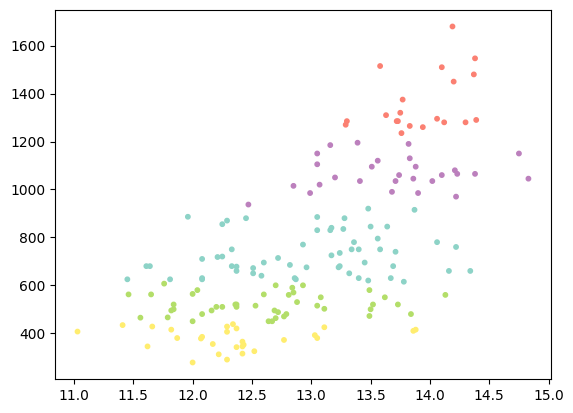

In [10]:
#Вот тут задаём количество кластеров: 5
model = AgglomerativeClustering(n_clusters=5)

#Остальное не меняется
y_model = model.fit_predict(df)
df['Cluster'] = y_model
plt.scatter(x = df['Alcohol'], y = df['Proline'], c=df['Cluster'], s=10, cmap = "Set3")

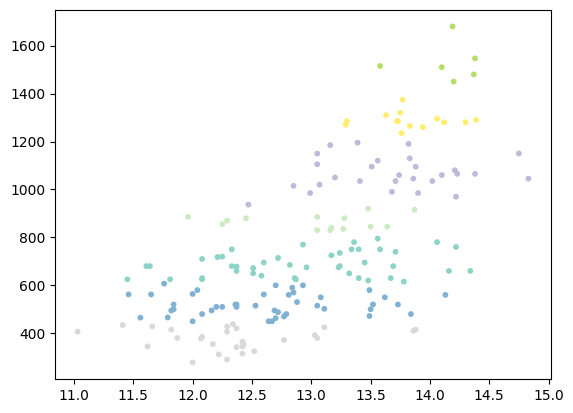

In [11]:
#Вот тут задаём количество кластеров: 7
model = AgglomerativeClustering(n_clusters=7)

#Остальное не меняется
y_model = model.fit_predict(df)
df['Cluster'] = y_model
plt.scatter(x = df['Alcohol'], y = df['Proline'], c=df['Cluster'], s=10, cmap = "Set3")

Как вообще понять, какое количество классов адекватно брать? Один способ, который мы фактически только что применили — перебор. Можно глазами посмотреть на картинки, и посмотреть, насколько выделенные группы отделимы друг от друга.

В целом можно видеть, что, с одной стороны, кластеры выходят достаточно адекватные, с другой, данные представляют собой некоторый континуум, который можно описать не только с помощью кластеризации, но и, например, проведя прямую. С третьей стороны, в таблице есть и другие численные параметры, которые мы не отражаем на картинке — могло бы быть интересно посмотреть и на них.

Другой способ обосновать выбранное количество кластеров — построить дендрограмму. Это алгоритм, который раз за разом разделяет данные на две группы — и таким образом позволяет одновременно наблюдать сразу множество разделений на кластеры.

1. Ветви: Каждая строка горизонтальная линия соединяет два кластера, указывая на их слияние. Чем ниже линия соединяет кластеры, тем более похожи эти кластеры.

2. Высота соединений: Вертикальная ось (высота в дендрограмме) представляет расстояние или различие между объединяемыми кластерами. Маленькие значения означают, что кластеры очень похожи.

3. Определение количества кластеров: Вы можете "разрезать" дендрограмму на определенной высоте, чтобы определить количество кластеров. Это делается визуально — выбирается уровень, на котором происходит явное разделение групп.

4. Плотность данных: Если группы (цветные) компактные, это свидетельствует о четкой кластеризации.

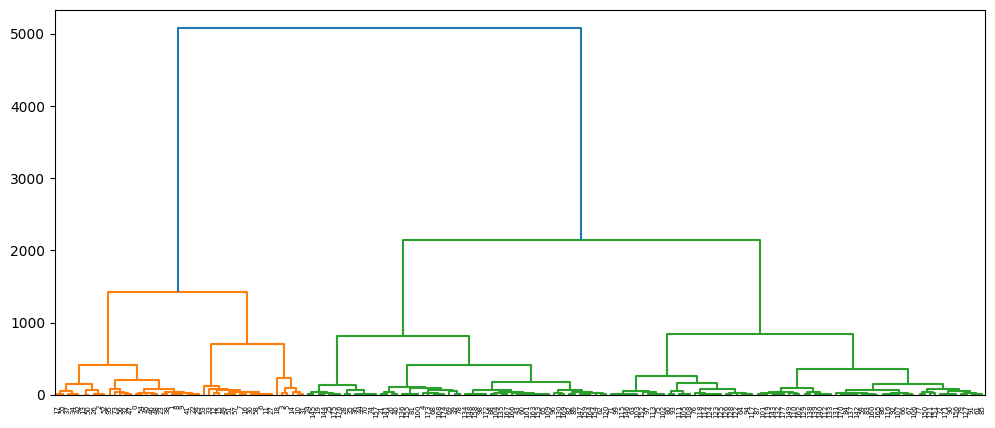

In [12]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))

Оптимальное количество кластеров, в соответствии с дендрограммой, находится следующим образом: наиболее длинная вертикальная ветвь дендрограммы делится напополам, и в этой точке проводится горизонтальная линия. Количество кластеров соответствует количеству вертикальных линий, которые она пересечёт. В нашем случае это два кластера.

![dendro_line](dendro_line.png)

При этом имеет смысл использовать разные методы: и посмотреть на дендрограмму, и рассмотреть, как выглядят кластеры на изображении, и — для текстов, обратить внимание на то, осмысленна ли кластеризация с точки зрения, собственно, их содержания.

Теперь перейдём к текстам!

# Кластеризуем тексты

Кластеризация является важным инструментом в обработке текстов, широко используемым для анализа и организации больших объемов текстовых данных. Этот метод позволяет группировать тексты на основе их сходства, что делает его полезным для различных исследовательских задач.

**Применение кластеризации в текстовом анализе**

1. **Исследование и анализ данных**:
   - Кластеризация помогает исследователям выявлять скрытые структуры в текстовых данных. Группируя похожие документы, можно легче обнаружить основные темы и тенденции, что облегчает анализ больших текстовых корпусов.


2. **Поиск аномалий**:
   - Кластеризация эффективна для выявления аномальных или нетипичных текстов. Документы, которые не попадают в основные кластеры, могут указывать на аномалии или исключительные случаи, требующие особого внимания.

**Преимущества кластеризации**

- **Автоматизация**: Кластеризация позволяет автоматизировать процесс организации и классификации текстов, что значительно экономит время и ресурсы.
- **Обнаружение тем**: Группировка текстов по сходству помогает выявлять ключевые темы и содержание без необходимости предварительного задания категорий.
- **Улучшение качества данных**: Поиск аномалий через кластеризацию помогает очищать данные, выявляя и устраняя нетипичные или ошибочные записи.

Возьмем датасет новостей с kaggle

In [1]:
%%capture

#Импортируем модули (часть повторяется; в проекте лучше делать импорт один раз в начале
#но собираю их здесь, чтобы было проще
!pip install umap-learn
!pip install --force-reinstall -v "numpy==2.1"
!pip install wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%capture

#Код для предобработки данных

!pip install pymorphy3
!pip install nltk
import nltk
from pymorphy3 import MorphAnalyzer
analyzer = MorphAnalyzer()

def preproc_simple(text):

  word_list = []

  for i in nltk.tokenize.word_tokenize(text):

      norm_form = analyzer.parse(i)[0].normal_form #Тут используется функция, которая делает морфологический разбор и достаёт лемму
      word_list.append(norm_form)

  return ' '.join(word_list)

In [4]:
#Скачиваем датасет, который будем использовать в качестве примера
#Скачивание займёт какое-то время
url = 'https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.1/lenta-ru-news.csv.bz2'

raw_df = pd.read_csv(url, compression='bz2')
raw_df.head()

/tmp/ipykernel_4314/617166960.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(url, compression='bz2')


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


In [10]:
#Обрезаем данные: тетрадь имеет учебные цели, и мы можем пожертвовать
#охватом в пользу скорости
df = raw_df['text'][0:1000]

In [11]:
df.tail()

995    Согласно опубликованному в понедельник пресс-р...
996    Во вторник в Москве открылись международные то...
997    18 октября Центризбирком заверил федеральный с...
998    Американские военные, размещенные в Европе, оп...
999    Премьер-министр Литвы Роландас Паксас заявил, ...
Name: text, dtype: object

In [12]:
#Делаем из вырезанного столбца с текстами отдельный датафрейм
#остальная информация нам не нужна
#Обратите внимание, что до этого этапа можно добраться самыми разными способами
#в зависимости от исходных данных — а собственно кластеризация начинается дальше
df = pd.DataFrame(df)
df

,text
0,Бои у Сопоцкина и Друскеник закончились отступ...
1,"Министерство народного просвещения, в виду про..."
2,"Штабс-капитан П. Н. Нестеров на днях, увидев в..."
3,Фотограф-корреспондент Daily Mirror рассказыва...
4,"Лица, приехавшие в Варшаву из Люблина, передаю..."
...,...
995,Согласно опубликованному в понедельник пресс-р...
996,Во вторник в Москве открылись международные то...
997,18 октября Центризбирком заверил федеральный с...
998,"Американские военные, размещенные в Европе, оп..."


In [13]:
#Лемматизируем все тексты и записываем с отельный столбец; это займёт какое-то время
df['text_preproc'] = df['text'].map(preproc_simple)

In [14]:
#Векторизация — преобразуем текстовые данные в числа

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preproc'])

In [15]:
#Каждому слову сопоставляется вектор, который выглядит как список из кучи циферок
#Теперь мы можем применять методы кластеризации, которые используют числа
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Приятный момент: приведённый метод векторизации сработает для любого языка. Но для языков типа японского или китайского, где слова не разделены пробелами, обязательно произвести токенизацию. Можно и лучше сделать это на стадии предобработки. Другой вариант — добавить токенизатор в функцию векторизации. Ниже приводится пример токенизатора для японского, более простого и быстрого, по сравнению с Stanza. К тому же, в нём нет лемматизации, что довольно плохо. Если оказывается, что его качества недостаточно, можно токенизировать данные с помощью Stanza, а потом соединить через пробел — и тогда будет отрабатывать код из ячейки сверху без дополнений.

In [16]:
#Устанавливаем и обустраиваем токенизатор
!pip install TinySegmenter
from tinysegmenter import TinySegmenter
segmenter = TinySegmenter()

texts_jap = pd.Series('10日放送の「中居正広のミになる図書館」（テレビ朝日系）で、SMAPの中居正広が、篠原信一の過去の勘違いを明かす一幕があった。')

#Проводим векторизацию с токенизатором
vectorizer_jap = TfidfVectorizer(tokenizer=segmenter.tokenize)
X_jap = vectorizer_jap.fit_transform(texts_jap)

#Теперь можно, например, посмотреть на получившийся словарь, который выглядит относительно адекватно
list(vectorizer_jap.vocabulary_.items())[3:8]


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/home/aleksey/Programming/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[('放送', 22), ('の', 13), ('「', 5), ('中居', 18), ('正広', 26)]

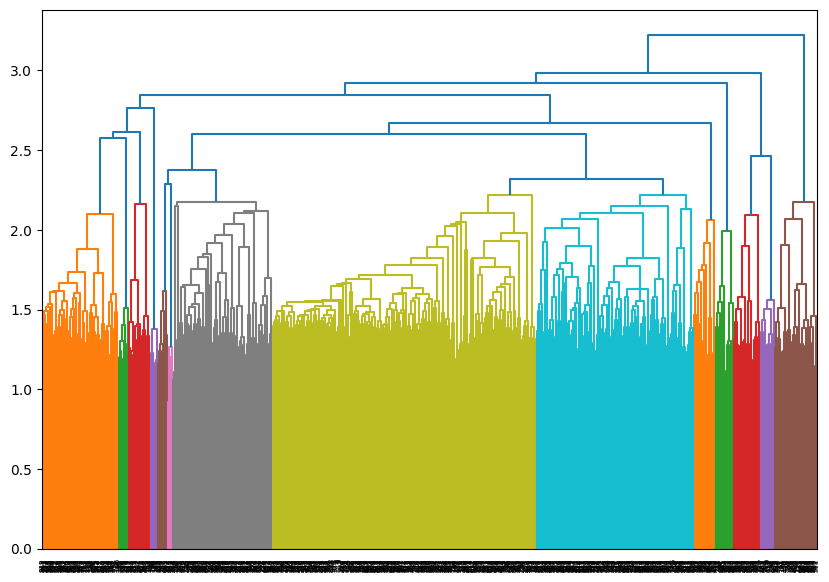

In [17]:
#Вернёмся к русскому примеру

#Нарисуем дендрограмму, чтобы оценить количество кластеров
linked = linkage(X.toarray(), 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

Как можно видеть, данные оказываются довольно разнородными, и есть смысл выделять большое количество кластеров — 10 или больше. Возьмём 13 кластеров. В более расширенном исследовании, конечно, нужно посмотреть на разные варианты.

In [29]:
#Произведём аггломеративную кластеризацию
clustering = AgglomerativeClustering(n_clusters=13, metric='euclidean', linkage='ward')
df['cluster'] = clustering.fit_predict(X.toarray())

df.head(10)

,text,text_preproc,cluster
0,Бои у Сопоцкина и Друскеник закончились отступ...,бой у сопоцкина и друскеник закончиться отступ...,1
1,"Министерство народного просвещения, в виду про...","министерство народный просвещение , в вид прои...",1
2,"Штабс-капитан П. Н. Нестеров на днях, увидев в...","штабс-капитан п. н. нестеров на день , увидеть...",1
3,Фотограф-корреспондент Daily Mirror рассказыва...,фотограф-корреспондент daily mirror рассказыва...,1
4,"Лица, приехавшие в Варшаву из Люблина, передаю...","лицо , приехать в варшава из люблин , передава...",1
5,Как стало известно агентству Ассошиэйтед Пресс...,как стать известно агентство ассошиэйтед пресс...,2
6,В зале игровых автоматов в третьем ярусе подзе...,в зал игровой автомат в третий ярус подземный ...,12
7,Япония приняла решение разморозить кредиты Рос...,япония принять решение разморозить кредит росс...,10
8,Британцы отмечают сегодня скорбную дату - втор...,британец отмечать сегодня скорбный дата - втор...,1
9,В понедельник директор департамента внешних св...,в понедельник директор департамент внешний свя...,10


А что дальше делать с этими кластерами? Так как алгоритм класттеризации опирается на семантику, прежде всего, глубже посмотреть на их содержание. Выделить ключевые слова для найденных кластеров по отдельности (например, используя материалы из соответствующей тетрадки), визуализировать информацию о распределении слов в них с помощью облака слов, а также посмотреть отдельные тексты, чтобы убедиться, что их содержимое в основном соответствует выделенным ключевым словам — что в них немного шума.

Используем метод yake, чтобы выделить ключевые слова для кластеров 2 и 7 (см. [тетрадку](https://github.com/alekseyst/text_analysis_2025/blob/main/Practical_8/Practical_8_KeyWords.ipynb) для более подробного обсуждения того, как выделяются ключевые слова).

In [20]:
%%capture

#Устанавливаем и импортируем модуль
!pip install yake
import yake

In [22]:
#Фильтруем и объединяем тексты кластера 2

cluster_2_df = df[df['cluster'] == 2]

cluster_2_text = ' '.join(cluster_2_df['text_preproc'])

In [24]:
#Создаём функцию, извлекающую ключевые слова

extractor = yake.KeywordExtractor(lan='ru', n=1)

#Извлекаем ключевые слова из кластера 2
keywords = extractor.extract_keywords(cluster_2_text)

#Печатаем их
for kw in keywords:
    print(kw)

('компания', np.float64(0.0004199737726918645))
('россия', np.float64(0.000616916447071609))
('новый', np.float64(0.0006532304358881325))
('российский', np.float64(0.0008108889818429155))
('сша', np.float64(0.0008501427227979872))
('свой', np.float64(0.0008869959198018372))
('доллар', np.float64(0.0010742734877019688))
('миллион', np.float64(0.0011158483265400739))
('система', np.float64(0.0011383524591265675))
('страна', np.float64(0.0012511596191711744))
('сообщать', np.float64(0.0014717230309529317))
('интернет', np.float64(0.0015065869733641214))
('банк', np.float64(0.0018238729576781597))
('миллиард', np.float64(0.001829712376249918))
('сообщить', np.float64(0.0019368528373056174))
('представитель', np.float64(0.0019602200640171583))
('слово', np.float64(0.0019760702123221415))
('заявить', np.float64(0.002063348450394322))
('связь', np.float64(0.0021667761902136036))
('американский', np.float64(0.0024456738642785717))


In [28]:
#Фильтруем и объединяем тексты кластера 7

cluster_7_df = df[df['cluster'] == 7]

cluster_7_text = ' '.join(cluster_7_df['text_preproc'])

#Извлекаем ключевые слова из кластера 2
keywords = extractor.extract_keywords(cluster_7_text)

#Печатаем их
for kw in keywords:
    print(kw)

('москва', np.float64(0.0007061320574972003))
('мэр', np.float64(0.0007665548431250557))
('лужков', np.float64(0.0011439087856439517))
('юрий', np.float64(0.001615251969372838))
('московский', np.float64(0.0035219491512964206))
('свой', np.float64(0.004954603652169983))
('сергей', np.float64(0.005572409406825847))
('сайт', np.float64(0.005680308855992182))
('выборы', np.float64(0.00616930310178919))
('сентябрь', np.float64(0.006833009865067173))
('столица', np.float64(0.007283360172541607))
('городской', np.float64(0.007864427185133378))
('батурин', np.float64(0.008192611595982517))
('россия', np.float64(0.008210520465900727))
('слово', np.float64(0.00830216348755313))
('сообщить', np.float64(0.008543353380796825))
('кандидат', np.float64(0.009295870108166113))
('кириенко', np.float64(0.010264914122590332))
('интерфакс', np.float64(0.010980394958569423))
('президент', np.float64(0.011758481853473618))


Мы явно видим, что содержание кластеров отличается — и при этом ключевые слова достаточно хорошо друг с другом согласуются внутри каждого кластера. В первом случае что-то про финансовое взаимодействие России и Америки, во втором — про Москву.

Если хочется посмотреть на каждый из кластеров (это следовало бы сделать при полноценном исследовании — хотя неудачно, что их слишком много), следует, конечно, не копировать ячейку выше для каждого из них, а написать цикл.

Визуализуем расположение кластеров. Эта визуализация не будет представлять полные данные — так как нам приходится понизить размерность векторов. Но какое-то представления она даёт: можно оценить, насколько кластеры действительно группируются в пространстве.

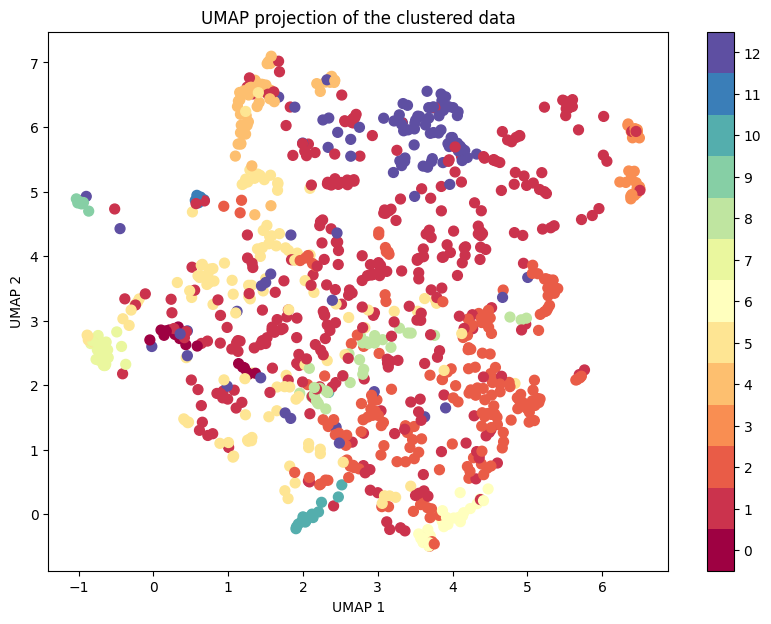

In [32]:
#Запускаем магию математики...
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = umap_model.fit_transform(X)

#Рисуем картинку
plt.figure(figsize=(10, 7))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=df['cluster'], cmap='Spectral', s=50)
#Обратите внимание! Ниже в .arange(13+1) перед плюсом следует вписать количество кластеров (у нас это 13) 
plt.colorbar(boundaries=np.arange(13+1)-0.5).set_ticks(np.arange(n_clusters))
plt.title('UMAP projection of the clustered data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

Мы можем использовать и другой метод кластеризации — выше это была аггломеративная кластеризация, ниже метод KMeans (метод k-средних). В зависимости от конкретного случая, разные методы могут дать разные результаты, и какие-то могут работать лучше других.

Применим его и посмотрим, не будет ли лучше картинка (спойлер: может быть и лучше, но это не очевидно).

In [35]:
from sklearn.cluster import KMeans

#Применение k-means
n_clusters = 13  # количество кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#Напомним, что в переменной X находятся наши вектора, полученные из слов
df['cluster'] = kmeans.fit_predict(X)

# вывод первых строк с кластерной меткой
df.head(10)

,text,text_preproc,cluster
0,Бои у Сопоцкина и Друскеник закончились отступ...,бой у сопоцкина и друскеник закончиться отступ...,4
1,"Министерство народного просвещения, в виду про...","министерство народный просвещение , в вид прои...",4
2,"Штабс-капитан П. Н. Нестеров на днях, увидев в...","штабс-капитан п. н. нестеров на день , увидеть...",4
3,Фотограф-корреспондент Daily Mirror рассказыва...,фотограф-корреспондент daily mirror рассказыва...,4
4,"Лица, приехавшие в Варшаву из Люблина, передаю...","лицо , приехать в варшава из люблин , передава...",4
5,Как стало известно агентству Ассошиэйтед Пресс...,как стать известно агентство ассошиэйтед пресс...,3
6,В зале игровых автоматов в третьем ярусе подзе...,в зал игровой автомат в третий ярус подземный ...,0
7,Япония приняла решение разморозить кредиты Рос...,япония принять решение разморозить кредит росс...,8
8,Британцы отмечают сегодня скорбную дату - втор...,британец отмечать сегодня скорбный дата - втор...,4
9,В понедельник директор департамента внешних св...,в понедельник директор департамент внешний свя...,8


/home/aleksey/Programming/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/aleksey/Programming/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


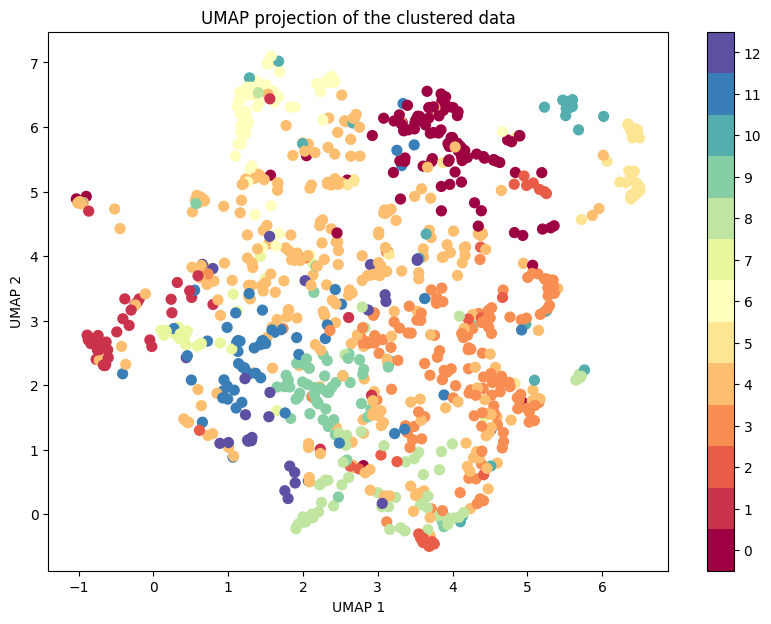

In [36]:
#Запускаем магию математики...
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = umap_model.fit_transform(X)

#Рисуем картинку
plt.figure(figsize=(10, 7))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=df['cluster'], cmap='Spectral', s=50)
#Обратите внимание! Ниже в .arange(13+1) перед плюсом следует вписать количество кластеров (у нас это 13) 
plt.colorbar(boundaries=np.arange(13+1)-0.5).set_ticks(np.arange(n_clusters))
plt.title('UMAP projection of the clustered data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

TSNE

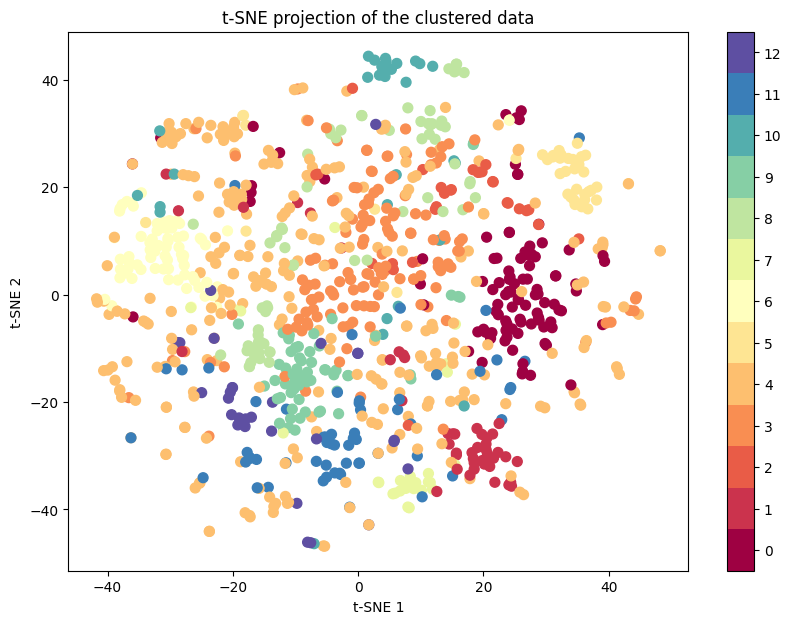

In [37]:
from sklearn.manifold import TSNE

# t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings = tsne_model.fit_transform(X.toarray())

# Визуализация
plt.figure(figsize=(10, 7))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=df['cluster'], cmap='Spectral', s=50)
plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(n_clusters))
plt.title('t-SNE projection of the clustered data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()